In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Jupyter inline plotting
%matplotlib inline

from bec.params.energy_levels import EnergyLevels
from bec.params.phonon_params import PhononParams, PhononModelType
from bec.quantum_dot.phonon_model import PhononModel


In [2]:
# Dummy EnergyLevels (polaron_B doesn't depend on EL, but constructor needs it)
EL = EnergyLevels(
    biexciton=1.300,
    exciton=1.297,
    fss=0.0,
    delta_prime=0.0,
    enforce_2g_guard=False,
)

# Paper parameters:
alpha_s2 = 0.027e-24   # 0.027 ps^2 -> s^2
omega_c  = 2.2e12      # 2.2 ps^-1 -> rad/s

Ts = np.linspace(0.0, 60.0, 121)  # 0..60 K (0.5 K step)
Bs = []

for T in Ts:
    p = PhononParams(
        model=PhononModelType.POLARON,
        alpha_s2=alpha_s2,
        omega_c_rad_s=omega_c,
        temperature_K=float(T),
    )
    Bs.append(PhononModel(EL, p).polaron_B())

Bs = np.array(Bs)

Bs[:10], Bs[-10:]


(array([0.9678579 , 0.96767436, 0.96713137, 0.9662501 , 0.96506115,
        0.96359971, 0.96190165, 0.96000088, 0.95792799, 0.95570977]),
 array([0.6811602 , 0.67882579, 0.67649923, 0.67418049, 0.67186956,
        0.66956641, 0.66727101, 0.66498335, 0.66270341, 0.66043115]))

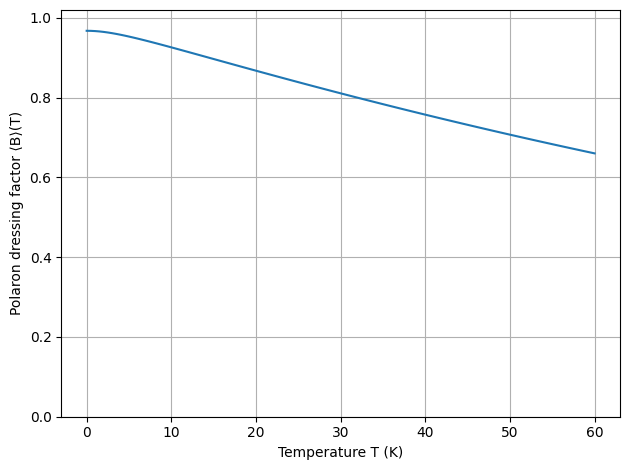

In [3]:
plt.figure()
plt.plot(Ts, Bs)
plt.xlabel("Temperature T (K)")
plt.ylabel("Polaron dressing factor ⟨B⟩(T)")
plt.ylim(0.0, 1.02)
plt.grid(True)
plt.tight_layout()
plt.show()


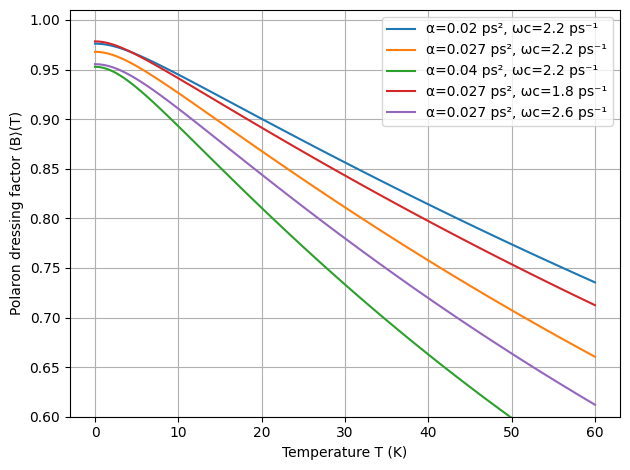

In [4]:
plt.figure()

# Temperature axis
Ts = np.linspace(0.0, 60.0, 121)

# Parameter sets to compare
param_sets = [
    # (label, alpha_s2, omega_c_rad_s)
    ("α=0.02 ps², ωc=2.2 ps⁻¹", 0.02e-24, 2.2e12),
    ("α=0.027 ps², ωc=2.2 ps⁻¹", 0.027e-24, 2.2e12),  # paper
    ("α=0.04 ps², ωc=2.2 ps⁻¹", 0.04e-24, 2.2e12),
    ("α=0.027 ps², ωc=1.8 ps⁻¹", 0.027e-24, 1.8e12),
    ("α=0.027 ps², ωc=2.6 ps⁻¹", 0.027e-24, 2.6e12),
]

for label, alpha_s2, omega_c in param_sets:
    Bs = []
    for T in Ts:
        p = PhononParams(
            model=PhononModelType.POLARON,
            alpha_s2=alpha_s2,
            omega_c_rad_s=omega_c,
            temperature_K=float(T),
        )
        Bs.append(PhononModel(EL, p).polaron_B())

    plt.plot(Ts, Bs, label=label)

plt.xlabel("Temperature T (K)")
plt.ylabel("Polaron dressing factor ⟨B⟩(T)")
plt.ylim(0.6, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()